✅ Environment setup complete!
All libraries imported successfully

2. BASIC DATA TYPE CONVERSIONS
Creating sample 'messy' customer data...

Original messy data:
  customer_id        name         age      income  height    date_joined  \
0        C001  John Smith          25     $50,000   5'10"     01/15/2020   
1        C002  MARY JONES    34 years       65000  168 cm     2021-03-22   
2        C003  bob wilson          45  $85,000.00  6 feet  March 1, 2019   
3        C004   Sarah Lee  thirty-two         45k  5.5 ft     12-25-2021   
4        C005  Mike Brown          29       70000     175     2020/07/30   

   gender    satisfaction  
0       M  Very Satisfied  
1  Female       Satisfied  
2    male         Neutral  
3       F    Dissatisfied  
4       M  Very Satisfied  

Data types before conversion:
customer_id     object
name            object
age             object
income          object
height          object
date_joined     object
gender          object
satisfaction    object

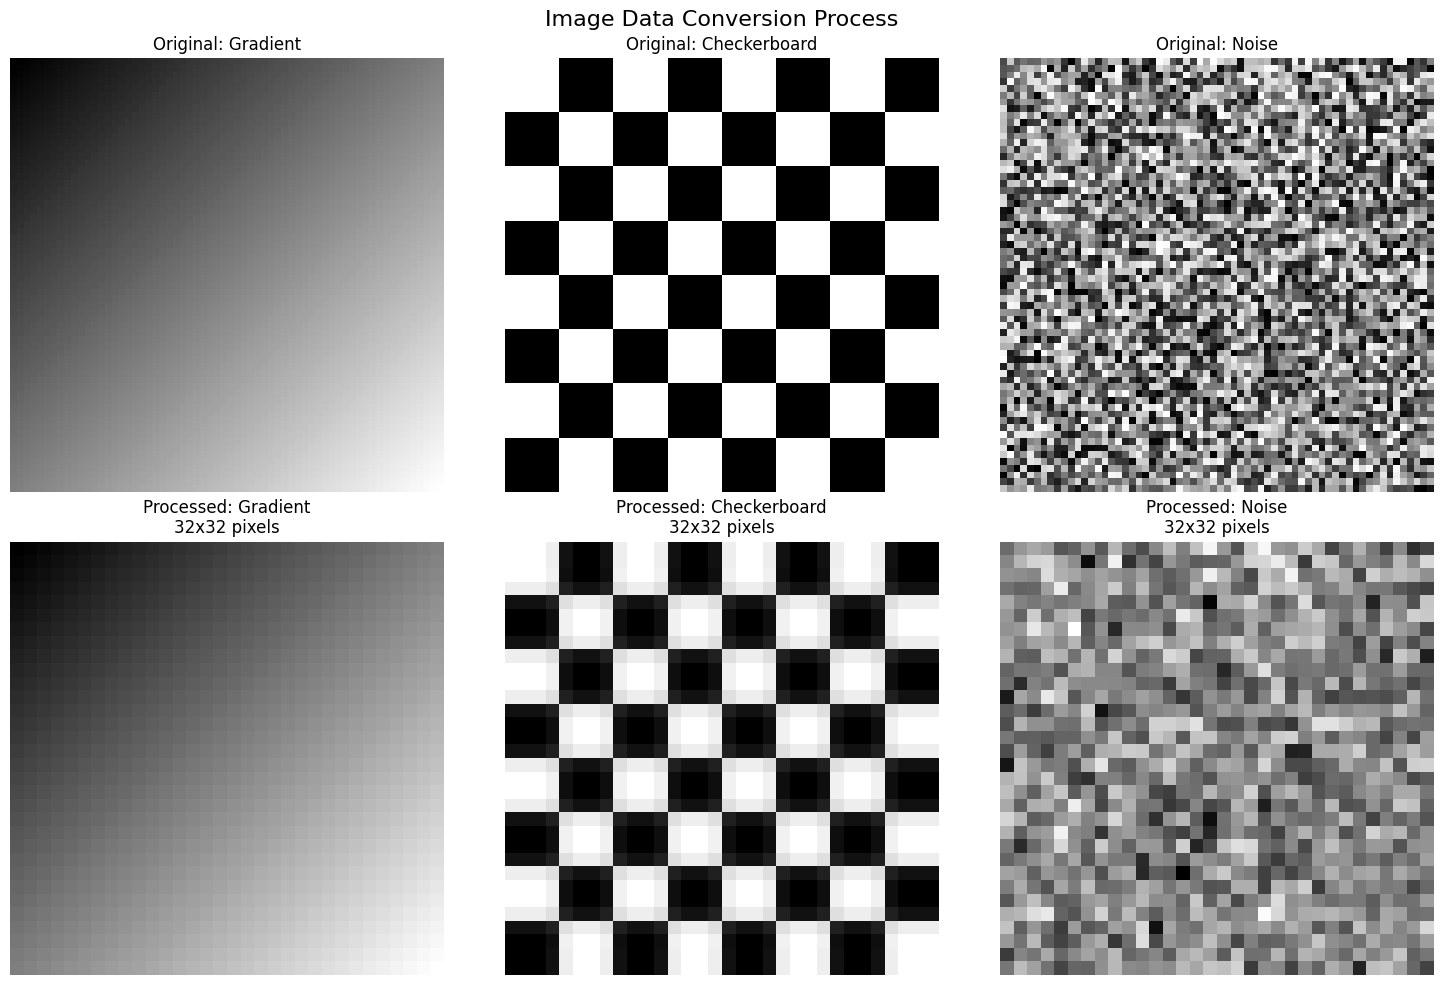

✅ Visualization complete

5. TIME SERIES DATA CONVERSION
Creating sample time series data...
✅ Created 365 days of stock data
Sample data:
        date       price  volume
0 2023-01-01  100.000000    6029
1 2023-01-02   99.723471    1133
2 2023-01-03  101.018848    3105
3 2023-01-04  104.064908    4627
4 2023-01-05  103.596601    7316

5.1 Creating time-based features...
✅ Time-based features created
New time features:
['year', 'month', 'day', 'day_of_week', 'day_of_year', 'week_of_year', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'is_weekend', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end']

5.2 Creating lag features (historical values)...
✅ Lag features created
Lag features for price: ['price_lag_1', 'price_lag_3', 'price_lag_7', 'price_lag_14', 'price_lag_30']

5.3 Creating rolling window (moving average) features...
✅ Rolling window features created

5.4 Creating change and return features...
✅ Change and return features created

5.5 Creating technical 

In [1]:
# Data Conversion for AI: Practical Examples
# Google Colab Notebook for hands-on learning

"""
This notebook provides practical examples of data conversion techniques for AI applications.
It's designed to complement the deep dive document and help you understand the concepts
through hands-on coding examples.

Requirements:
- No prior programming experience required
- All examples are extensively commented
- Run each cell in order for best results

Table of Contents:
1. Environment Setup
2. Basic Data Type Conversions
3. Text Data Conversion
4. Image Data Conversion
5. Time Series Data Conversion
6. Healthcare Data Example
7. Finance Data Example
8. Best Practices Implementation
"""

# ========================================
# 1. ENVIRONMENT SETUP
# ========================================

# Install required libraries (run this first in Google Colab)
!pip install pandas numpy matplotlib seaborn scikit-learn pillow wordcloud textblob

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from PIL import Image
import io
import base64
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Environment setup complete!")
print("All libraries imported successfully")

# ========================================
# 2. BASIC DATA TYPE CONVERSIONS
# ========================================

print("\n" + "="*50)
print("2. BASIC DATA TYPE CONVERSIONS")
print("="*50)

# Create sample data that mimics real-world messiness
print("Creating sample 'messy' customer data...")

# Simulate raw customer data with various formats and issues
raw_customer_data = {
    'customer_id': ['C001', 'C002', 'C003', 'C004', 'C005'],
    'name': ['John Smith', 'MARY JONES', 'bob wilson', 'Sarah Lee', 'Mike Brown'],
    'age': ['25', '34 years', '45', 'thirty-two', '29'],
    'income': ['$50,000', '65000', '$85,000.00', '45k', '70000'],
    'height': ['5\'10"', '168 cm', '6 feet', '5.5 ft', '175'],
    'date_joined': ['01/15/2020', '2021-03-22', 'March 1, 2019', '12-25-2021', '2020/07/30'],
    'gender': ['M', 'Female', 'male', 'F', 'M'],
    'satisfaction': ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Satisfied']
}

df = pd.DataFrame(raw_customer_data)
print("\nOriginal messy data:")
print(df)
print(f"\nData types before conversion:")
print(df.dtypes)

# ----------------------------------------
# 2.1 Cleaning and Standardizing Names
# ----------------------------------------
print("\n2.1 Cleaning and standardizing names...")

def clean_names(name):
    """
    Standardize name formatting to Title Case
    """
    return name.strip().title()

df['name_cleaned'] = df['name'].apply(clean_names)
print("✅ Names standardized to Title Case")

# ----------------------------------------
# 2.2 Converting Age Data
# ----------------------------------------
print("\n2.2 Converting messy age data to numbers...")

def extract_age(age_string):
    """
    Extract numerical age from various text formats
    """
    age_string = str(age_string).lower()

    # Handle text numbers
    text_to_num = {
        'thirty-two': 32, 'thirty': 30, 'twenty': 20,
        'forty': 40, 'fifty': 50, 'sixty': 60
    }

    if age_string in text_to_num:
        return text_to_num[age_string]

    # Extract numbers from strings like "34 years"
    import re
    numbers = re.findall(r'\d+', age_string)
    if numbers:
        return int(numbers[0])

    return None

df['age_numeric'] = df['age'].apply(extract_age)
print("✅ Ages converted to numeric format")
print(f"Age conversion results: {df[['age', 'age_numeric']].to_dict('records')}")

# ----------------------------------------
# 2.3 Converting Income Data
# ----------------------------------------
print("\n2.3 Converting income data to standard format...")

def extract_income(income_string):
    """
    Convert various income formats to numerical values
    """
    income_string = str(income_string).lower()

    # Remove currency symbols and commas
    income_string = income_string.replace('$', '').replace(',', '')

    # Handle 'k' suffix (thousands)
    if 'k' in income_string:
        number = float(income_string.replace('k', ''))
        return number * 1000

    # Extract pure numbers
    import re
    numbers = re.findall(r'[\d.]+', income_string)
    if numbers:
        return float(numbers[0])

    return None

df['income_numeric'] = df['income'].apply(extract_income)
print("✅ Income converted to numeric format")
print(f"Income conversion results: {df[['income', 'income_numeric']].to_dict('records')}")

# ----------------------------------------
# 2.4 Converting Height Data
# ----------------------------------------
print("\n2.4 Converting height data to centimeters...")

def convert_height_to_cm(height_string):
    """
    Convert various height formats to centimeters
    """
    height_string = str(height_string).lower()

    # Handle feet and inches (5'10")
    if "'" in height_string and '"' in height_string:
        import re
        parts = re.findall(r"(\d+)'(\d+)", height_string)
        if parts:
            feet, inches = parts[0]
            total_inches = int(feet) * 12 + int(inches)
            return round(total_inches * 2.54, 1)  # Convert to cm

    # Handle "feet" format
    if 'feet' in height_string or 'ft' in height_string:
        import re
        numbers = re.findall(r'[\d.]+', height_string)
        if numbers:
            feet = float(numbers[0])
            total_inches = feet * 12
            return round(total_inches * 2.54, 1)

    # Handle centimeters
    if 'cm' in height_string:
        import re
        numbers = re.findall(r'[\d.]+', height_string)
        if numbers:
            return float(numbers[0])

    # Handle plain numbers (assume cm if reasonable, feet if small)
    import re
    numbers = re.findall(r'[\d.]+', height_string)
    if numbers:
        num = float(numbers[0])
        if num < 10:  # Likely feet
            return round(num * 12 * 2.54, 1)
        else:  # Likely cm
            return num

    return None

df['height_cm'] = df['height'].apply(convert_height_to_cm)
print("✅ Heights converted to centimeters")
print(f"Height conversion results: {df[['height', 'height_cm']].to_dict('records')}")

# ----------------------------------------
# 2.5 Converting Date Data
# ----------------------------------------
print("\n2.5 Converting various date formats...")

def standardize_date(date_string):
    """
    Convert various date formats to standard YYYY-MM-DD
    """
    from datetime import datetime

    # Common date formats to try
    formats = [
        '%m/%d/%Y',    # 01/15/2020
        '%Y-%m-%d',    # 2021-03-22
        '%Y/%m/%d',    # 2020/07/30
        '%m-%d-%Y',    # 12-25-2021
        '%B %d, %Y'    # March 1, 2019
    ]

    for fmt in formats:
        try:
            date_obj = datetime.strptime(date_string, fmt)
            return date_obj.strftime('%Y-%m-%d')
        except ValueError:
            continue

    return None

df['date_joined_standard'] = df['date_joined'].apply(standardize_date)
print("✅ Dates standardized to YYYY-MM-DD format")
print(f"Date conversion results: {df[['date_joined', 'date_joined_standard']].to_dict('records')}")

# ----------------------------------------
# 2.6 Converting Categorical Data
# ----------------------------------------
print("\n2.6 Converting categorical data using different encoding methods...")

# Gender encoding (binary)
def standardize_gender(gender):
    """
    Standardize gender representation
    """
    gender = str(gender).lower().strip()
    if gender in ['m', 'male']:
        return 'Male'
    elif gender in ['f', 'female']:
        return 'Female'
    else:
        return 'Other'

df['gender_standard'] = df['gender'].apply(standardize_gender)

# One-hot encoding for gender
gender_encoded = pd.get_dummies(df['gender_standard'], prefix='gender')
df = pd.concat([df, gender_encoded], axis=1)

print("✅ Gender data standardized and one-hot encoded")

# Ordinal encoding for satisfaction (has natural order)
satisfaction_order = ['Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']
satisfaction_mapping = {val: idx for idx, val in enumerate(satisfaction_order)}
df['satisfaction_numeric'] = df['satisfaction'].map(satisfaction_mapping)

print("✅ Satisfaction data converted to ordinal encoding")
print(f"Satisfaction mapping: {satisfaction_mapping}")

# ----------------------------------------
# 2.7 Creating Derived Features
# ----------------------------------------
print("\n2.7 Creating derived features...")

# Create age groups
def categorize_age(age):
    """
    Create age categories for analysis
    """
    if age < 25:
        return 'Young Adult'
    elif age < 40:
        return 'Adult'
    elif age < 60:
        return 'Middle Age'
    else:
        return 'Senior'

df['age_group'] = df['age_numeric'].apply(categorize_age)

# Create income brackets
def categorize_income(income):
    """
    Create income brackets for analysis
    """
    if income < 40000:
        return 'Low Income'
    elif income < 70000:
        return 'Middle Income'
    else:
        return 'High Income'

df['income_bracket'] = df['income_numeric'].apply(categorize_income)

# Calculate BMI (if we had weight data, this is how we'd do it)
# For demonstration, we'll use hypothetical weight
np.random.seed(42)  # For reproducible results
df['weight_kg'] = np.random.normal(70, 15, len(df))  # Simulated weight data
df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

print("✅ Derived features created (age groups, income brackets, BMI)")

# Display final cleaned dataset
print("\n" + "="*60)
print("FINAL CLEANED DATASET")
print("="*60)
print(df[['customer_id', 'name_cleaned', 'age_numeric', 'income_numeric',
          'height_cm', 'date_joined_standard', 'gender_standard',
          'satisfaction_numeric', 'age_group', 'income_bracket', 'bmi']].round(2))

# ========================================
# 3. TEXT DATA CONVERSION
# ========================================

print("\n" + "="*50)
print("3. TEXT DATA CONVERSION")
print("="*50)

# Create sample customer review data
print("Creating sample customer review data...")

customer_reviews = [
    "This product is absolutely amazing! Great quality and fast delivery.",
    "Terrible experience. The item broke after one day. Very disappointed.",
    "Good value for money. Delivery was a bit slow but product is okay.",
    "Excellent customer service. The team was very helpful and responsive.",
    "Average product. Nothing special but does the job. Price is fair.",
    "Outstanding quality! Exceeded my expectations. Highly recommend!",
    "Poor packaging led to damaged item. Refund process was difficult.",
    "Love this product! Using it daily and very satisfied with performance."
]

reviews_df = pd.DataFrame({
    'review_id': range(1, len(customer_reviews) + 1),
    'review_text': customer_reviews
})

print(f"Created {len(customer_reviews)} sample reviews")

# ----------------------------------------
# 3.1 Basic Text Processing
# ----------------------------------------
print("\n3.1 Basic text processing and cleaning...")

def clean_text(text):
    """
    Clean and preprocess text data
    """
    import re

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

reviews_df['review_cleaned'] = reviews_df['review_text'].apply(clean_text)
print("✅ Text cleaned and preprocessed")

# ----------------------------------------
# 3.2 Tokenization (Breaking text into words)
# ----------------------------------------
print("\n3.2 Tokenizing text into individual words...")

def tokenize_text(text):
    """
    Split text into individual words (tokens)
    """
    return text.split()

reviews_df['tokens'] = reviews_df['review_cleaned'].apply(tokenize_text)
reviews_df['word_count'] = reviews_df['tokens'].apply(len)

print("✅ Text tokenized into words")
print(f"Word count examples: {reviews_df[['review_text', 'word_count']].head(3).to_dict('records')}")

# ----------------------------------------
# 3.3 Sentiment Analysis
# ----------------------------------------
print("\n3.3 Converting text to sentiment scores...")

# Install textblob if not already installed
try:
    from textblob import TextBlob

    def get_sentiment(text):
        """
        Get sentiment polarity (-1 to 1) and subjectivity (0 to 1)
        """
        blob = TextBlob(text)
        return blob.sentiment.polarity, blob.sentiment.subjectivity

    # Apply sentiment analysis
    sentiment_results = reviews_df['review_text'].apply(get_sentiment)
    reviews_df['sentiment_polarity'] = [s[0] for s in sentiment_results]
    reviews_df['sentiment_subjectivity'] = [s[1] for s in sentiment_results]

    # Create sentiment categories
    def categorize_sentiment(polarity):
        if polarity > 0.1:
            return 'Positive'
        elif polarity < -0.1:
            return 'Negative'
        else:
            return 'Neutral'

    reviews_df['sentiment_category'] = reviews_df['sentiment_polarity'].apply(categorize_sentiment)

    print("✅ Sentiment analysis completed")
    print("Sentiment distribution:")
    print(reviews_df['sentiment_category'].value_counts())

except ImportError:
    print("⚠️  TextBlob not available, using simple keyword-based sentiment")

    # Simple keyword-based sentiment analysis
    positive_words = ['amazing', 'excellent', 'great', 'good', 'love', 'outstanding', 'recommend']
    negative_words = ['terrible', 'poor', 'bad', 'disappointed', 'broke', 'difficult']

    def simple_sentiment(text):
        text_lower = text.lower()
        pos_count = sum(1 for word in positive_words if word in text_lower)
        neg_count = sum(1 for word in negative_words if word in text_lower)

        if pos_count > neg_count:
            return 'Positive'
        elif neg_count > pos_count:
            return 'Negative'
        else:
            return 'Neutral'

    reviews_df['sentiment_category'] = reviews_df['review_text'].apply(simple_sentiment)
    print("✅ Simple sentiment analysis completed")

# ----------------------------------------
# 3.4 Feature Extraction from Text
# ----------------------------------------
print("\n3.4 Extracting numerical features from text...")

# Create additional text features
def extract_text_features(text):
    """
    Extract various numerical features from text
    """
    features = {}

    # Basic length features
    features['char_count'] = len(text)
    features['word_count'] = len(text.split())
    features['avg_word_length'] = np.mean([len(word) for word in text.split()])

    # Punctuation features
    features['exclamation_count'] = text.count('!')
    features['question_count'] = text.count('?')
    features['capital_letters'] = sum(1 for c in text if c.isupper())

    # Sentence features
    features['sentence_count'] = len([s for s in text.split('.') if s.strip()])

    return features

# Extract features for each review
text_features = reviews_df['review_text'].apply(extract_text_features)
text_features_df = pd.DataFrame(list(text_features))

# Combine with original data
reviews_with_features = pd.concat([reviews_df, text_features_df], axis=1)

print("✅ Text features extracted")
print("Sample text features:")
print(text_features_df.head())

# ----------------------------------------
# 3.5 Converting Text to Numerical Vectors
# ----------------------------------------
print("\n3.5 Converting text to numerical vectors using TF-IDF...")

# TF-IDF Vectorization (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(
    max_features=20,  # Limit to top 20 words for simplicity
    stop_words='english',  # Remove common words like 'the', 'and'
    lowercase=True
)

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(reviews_df['review_cleaned'])
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=[f'tfidf_{word}' for word in vectorizer.get_feature_names_out()]
)

print("✅ TF-IDF vectors created")
print(f"Vector dimensions: {tfidf_matrix.shape}")
print("Top words identified:")
print(list(vectorizer.get_feature_names_out()))

# Show final text conversion results
print("\n" + "="*60)
print("TEXT CONVERSION RESULTS")
print("="*60)
print("Features created from text:")
print("- Word count, character count, average word length")
print("- Punctuation counts (!, ?)")
print("- Sentiment analysis (positive/negative/neutral)")
print("- TF-IDF vectors for machine learning")
print(f"- Total features created: {len(text_features_df.columns) + len(tfidf_df.columns)}")

# ========================================
# 4. IMAGE DATA CONVERSION
# ========================================

print("\n" + "="*50)
print("4. IMAGE DATA CONVERSION")
print("="*50)

# Since we can't upload actual images in this demo, we'll create synthetic image data
print("Creating synthetic image data for demonstration...")

# Create a synthetic image (representing a simple pattern)
def create_sample_image(size=(64, 64), pattern='gradient'):
    """
    Create a sample image for demonstration
    """
    if pattern == 'gradient':
        # Create a gradient image
        image = np.zeros(size)
        for i in range(size[0]):
            for j in range(size[1]):
                image[i, j] = (i + j) / (size[0] + size[1]) * 255
    elif pattern == 'checkerboard':
        # Create a checkerboard pattern
        image = np.zeros(size)
        for i in range(size[0]):
            for j in range(size[1]):
                if (i // 8 + j // 8) % 2 == 0:
                    image[i, j] = 255
    else:
        # Random noise
        image = np.random.randint(0, 256, size)

    return image.astype(np.uint8)

# Create sample images
sample_images = {
    'gradient': create_sample_image(pattern='gradient'),
    'checkerboard': create_sample_image(pattern='checkerboard'),
    'noise': create_sample_image(pattern='noise')
}

print("✅ Sample images created")

# ----------------------------------------
# 4.1 Image Preprocessing and Standardization
# ----------------------------------------
print("\n4.1 Image preprocessing and standardization...")

def preprocess_image(image, target_size=(32, 32)):
    """
    Preprocess image for AI processing
    """
    from PIL import Image as PILImage

    # Convert numpy array to PIL Image
    pil_image = PILImage.fromarray(image)

    # Resize to target size
    resized = pil_image.resize(target_size)

    # Convert back to numpy array
    processed = np.array(resized)

    # Normalize pixel values to 0-1 range
    normalized = processed / 255.0

    return normalized

# Process all sample images
processed_images = {}
for name, image in sample_images.items():
    processed_images[name] = preprocess_image(image)

print("✅ Images preprocessed and normalized")
print(f"Original size: {sample_images['gradient'].shape}")
print(f"Processed size: {processed_images['gradient'].shape}")
print(f"Pixel value range: {processed_images['gradient'].min():.2f} to {processed_images['gradient'].max():.2f}")

# ----------------------------------------
# 4.2 Feature Extraction from Images
# ----------------------------------------
print("\n4.2 Extracting numerical features from images...")

def extract_image_features(image):
    """
    Extract statistical and structural features from an image
    """
    features = {}

    # Basic statistical features
    features['mean_intensity'] = np.mean(image)
    features['std_intensity'] = np.std(image)
    features['min_intensity'] = np.min(image)
    features['max_intensity'] = np.max(image)

    # Histogram features (distribution of pixel intensities)
    hist, _ = np.histogram(image.flatten(), bins=10, range=(0, 1))
    for i, count in enumerate(hist):
        features[f'histogram_bin_{i}'] = count

    # Edge detection (simple gradient)
    grad_x = np.gradient(image, axis=1)
    grad_y = np.gradient(image, axis=0)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    features['edge_density'] = np.mean(gradient_magnitude)

    # Contrast and texture measures
    features['contrast'] = np.max(image) - np.min(image)
    features['local_variance'] = np.mean(np.var(image.reshape(-1, 4), axis=1))

    return features

# Extract features from all processed images
image_features = {}
for name, image in processed_images.items():
    image_features[name] = extract_image_features(image)

print("✅ Image features extracted")
print("Features extracted per image:")
feature_names = list(image_features['gradient'].keys())
print(f"- {len(feature_names)} total features")
print(f"- Sample features: {feature_names[:5]}")

# Create DataFrame of image features
image_features_df = pd.DataFrame(image_features).T
print("\nImage features summary:")
print(image_features_df.round(3))

# ----------------------------------------
# 4.3 Converting Images to Pixel Arrays
# ----------------------------------------
print("\n4.3 Converting images to pixel arrays for machine learning...")

def image_to_feature_vector(image):
    """
    Flatten image to 1D array for machine learning
    """
    return image.flatten()

# Convert images to feature vectors
image_vectors = {}
for name, image in processed_images.items():
    image_vectors[name] = image_to_feature_vector(image)

print("✅ Images converted to feature vectors")
print(f"Feature vector size: {len(image_vectors['gradient'])}")
print(f"This means each image becomes {len(image_vectors['gradient'])} numerical features")

# ----------------------------------------
# 4.4 Visualizing the Conversion Process
# ----------------------------------------
print("\n4.4 Visualizing the image conversion process...")

# Create visualization of the conversion process
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Image Data Conversion Process', fontsize=16)

# Show original images
for idx, (name, image) in enumerate(sample_images.items()):
    axes[0, idx].imshow(image, cmap='gray')
    axes[0, idx].set_title(f'Original: {name.title()}')
    axes[0, idx].axis('off')

# Show processed images
for idx, (name, image) in enumerate(processed_images.items()):
    axes[1, idx].imshow(image, cmap='gray')
    axes[1, idx].set_title(f'Processed: {name.title()}\n{image.shape[0]}x{image.shape[1]} pixels')
    axes[1, idx].axis('off')

plt.tight_layout()
plt.show()

print("✅ Visualization complete")

# ========================================
# 5. TIME SERIES DATA CONVERSION
# ========================================

print("\n" + "="*50)
print("5. TIME SERIES DATA CONVERSION")
print("="*50)

# Create sample time series data (e.g., stock prices, sensor readings)
print("Creating sample time series data...")

# Generate synthetic stock price data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
base_price = 100
price_changes = np.random.normal(0, 2, len(dates))
prices = [base_price]

for change in price_changes[1:]:
    new_price = prices[-1] + change
    prices.append(max(new_price, 10))  # Prevent negative prices

stock_data = pd.DataFrame({
    'date': dates,
    'price': prices[:len(dates)],
    'volume': np.random.randint(1000, 10000, len(dates))
})

print(f"✅ Created {len(stock_data)} days of stock data")
print("Sample data:")
print(stock_data.head())

# ----------------------------------------
# 5.1 Time-based Feature Engineering
# ----------------------------------------
print("\n5.1 Creating time-based features...")

def extract_time_features(df):
    """
    Extract various time-based features from datetime data
    """
    df = df.copy()

    # Basic time features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week

    # Cyclical features (important for capturing seasonal patterns)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    # Business day features
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['is_month_start'] = df['date'].dt.is_month_start.astype(int)
    df['is_month_end'] = df['date'].dt.is_month_end.astype(int)
    df['is_quarter_start'] = df['date'].dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df['date'].dt.is_quarter_end.astype(int)

    return df

stock_data_with_time = extract_time_features(stock_data)
print("✅ Time-based features created")
print("New time features:")
time_features = [col for col in stock_data_with_time.columns if col not in ['date', 'price', 'volume']]
print(time_features)

# ----------------------------------------
# 5.2 Lag Features (Historical Values)
# ----------------------------------------
print("\n5.2 Creating lag features (historical values)...")

def create_lag_features(df, column, lags=[1, 3, 7, 14, 30]):
    """
    Create lag features for a given column
    """
    df = df.copy()

    for lag in lags:
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)

    return df

stock_data_with_lags = create_lag_features(stock_data_with_time, 'price')
stock_data_with_lags = create_lag_features(stock_data_with_lags, 'volume')

print("✅ Lag features created")
print("Lag features for price:", [col for col in stock_data_with_lags.columns if 'price_lag' in col])

# ----------------------------------------
# 5.3 Rolling Window Features
# ----------------------------------------
print("\n5.3 Creating rolling window (moving average) features...")

def create_rolling_features(df, column, windows=[7, 14, 30]):
    """
    Create rolling statistics features
    """
    df = df.copy()

    for window in windows:
        # Moving averages
        df[f'{column}_ma_{window}'] = df[column].rolling(window=window).mean()

        # Moving standard deviation (volatility)
        df[f'{column}_std_{window}'] = df[column].rolling(window=window).std()

        # Moving min and max
        df[f'{column}_min_{window}'] = df[column].rolling(window=window).min()
        df[f'{column}_max_{window}'] = df[column].rolling(window=window).max()

        # Ratio to moving average (momentum indicator)
        df[f'{column}_ratio_ma_{window}'] = df[column] / df[f'{column}_ma_{window}']

    return df

stock_data_with_rolling = create_rolling_features(stock_data_with_lags, 'price')
print("✅ Rolling window features created")

# ----------------------------------------
# 5.4 Change and Return Features
# ----------------------------------------
print("\n5.4 Creating change and return features...")

def create_change_features(df, column):
    """
    Create various change and return features
    """
    df = df.copy()

    # Absolute change
    df[f'{column}_change'] = df[column].diff()

    # Percentage change
    df[f'{column}_pct_change'] = df[column].pct_change()

    # Log returns (common in finance)
    df[f'{column}_log_return'] = np.log(df[column] / df[column].shift(1))

    # Cumulative changes
    df[f'{column}_cumulative_return'] = (1 + df[f'{column}_pct_change']).cumprod() - 1

    # Volatility (rolling standard deviation of returns)
    df[f'{column}_volatility_7d'] = df[f'{column}_pct_change'].rolling(7).std()

    return df

stock_data_final = create_change_features(stock_data_with_rolling, 'price')
print("✅ Change and return features created")

# ----------------------------------------
# 5.5 Technical Indicators
# ----------------------------------------
print("\n5.5 Creating technical indicators...")

def create_technical_indicators(df):
    """
    Create common technical indicators used in finance
    """
    df = df.copy()

    # RSI (Relative Strength Index) - simplified version
    def calculate_rsi(prices, window=14):
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    df['rsi'] = calculate_rsi(df['price'])

    # MACD (Moving Average Convergence Divergence)
    exp1 = df['price'].ewm(span=12).mean()
    exp2 = df['price'].ewm(span=26).mean()
    df['macd'] = exp1 - exp2
    df['macd_signal'] = df['macd'].ewm(span=9).mean()

    # Bollinger Bands
    rolling_mean = df['price'].rolling(window=20).mean()
    rolling_std = df['price'].rolling(window=20).std()
    df['bollinger_upper'] = rolling_mean + (rolling_std * 2)
    df['bollinger_lower'] = rolling_mean - (rolling_std * 2)
    df['bollinger_position'] = (df['price'] - rolling_mean) / (2 * rolling_std)

    return df

stock_data_final = create_technical_indicators(stock_data_final)
print("✅ Technical indicators created")

# Show summary of time series conversion
print("\n" + "="*60)
print("TIME SERIES CONVERSION SUMMARY")
print("="*60)
print(f"Original features: 3 (date, price, volume)")
print(f"Final features: {len(stock_data_final.columns)}")
print(f"Features created: {len(stock_data_final.columns) - 3}")

print("\nFeature categories created:")
print("- Time-based features (month, day, cyclical)")
print("- Lag features (historical values)")
print("- Rolling window features (moving averages, volatility)")
print("- Change features (returns, percentage changes)")
print("- Technical indicators (RSI, MACD, Bollinger Bands)")

# Display sample of final data
print("\nSample of converted time series data:")
sample_cols = ['date', 'price', 'price_change', 'price_ma_7', 'price_std_7', 'rsi', 'macd']
print(stock_data_final[sample_cols].tail().round(3))

# ========================================
# 6. HEALTHCARE DATA EXAMPLE
# ========================================

print("\n" + "="*50)
print("6. HEALTHCARE DATA CONVERSION EXAMPLE")
print("="*50)

# Create synthetic patient data
print("Creating synthetic patient data...")

np.random.seed(42)
n_patients = 100

# Generate realistic patient data
patient_data = {
    'patient_id': [f'P{i:04d}' for i in range(1, n_patients + 1)],
    'age': np.random.randint(18, 85, n_patients),
    'gender': np.random.choice(['Male', 'Female'], n_patients),
    'height_cm': np.random.normal(170, 15, n_patients),
    'weight_kg': np.random.normal(70, 15, n_patients),
    'systolic_bp': np.random.normal(130, 20, n_patients),
    'diastolic_bp': np.random.normal(80, 10, n_patients),
    'heart_rate': np.random.normal(72, 12, n_patients),
    'temperature': np.random.normal(98.6, 1.5, n_patients),
    'blood_sugar': np.random.normal(100, 30, n_patients),
    'cholesterol': np.random.normal(200, 40, n_patients),
    'smoking_status': np.random.choice(['Never', 'Former', 'Current'], n_patients, p=[0.5, 0.3, 0.2]),
    'family_history_diabetes': np.random.choice([0, 1], n_patients, p=[0.7, 0.3]),
    'exercise_hours_week': np.random.exponential(3, n_patients),
}

patients_df = pd.DataFrame(patient_data)
print(f"✅ Created data for {n_patients} patients")

# ----------------------------------------
# 6.1 Medical Feature Engineering
# ----------------------------------------
print("\n6.1 Creating medical risk indicators...")

def create_medical_features(df):
    """
    Create medically relevant features from patient data
    """
    df = df.copy()

    # BMI calculation
    df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

    # BMI categories
    def categorize_bmi(bmi):
        if bmi < 18.5:
            return 'Underweight'
        elif bmi < 25:
            return 'Normal'
        elif bmi < 30:
            return 'Overweight'
        else:
            return 'Obese'

    df['bmi_category'] = df['bmi'].apply(categorize_bmi)

    # Blood pressure categories
    def categorize_bp(systolic, diastolic):
        if systolic < 120 and diastolic < 80:
            return 'Normal'
        elif systolic < 130 and diastolic < 80:
            return 'Elevated'
        elif systolic < 140 or diastolic < 90:
            return 'High_Stage1'
        else:
            return 'High_Stage2'

    df['bp_category'] = df.apply(lambda row: categorize_bp(row['systolic_bp'], row['diastolic_bp']), axis=1)

    # Age risk categories
    def categorize_age_risk(age):
        if age < 40:
            return 'Low'
        elif age < 60:
            return 'Medium'
        else:
            return 'High'

    df['age_risk'] = df['age'].apply(categorize_age_risk)

    # Diabetes risk score (simplified)
    def calculate_diabetes_risk(row):
        risk_score = 0

        # Age factor
        if row['age'] > 45:
            risk_score += 1

        # BMI factor
        if row['bmi'] > 25:
            risk_score += 1

        # Blood pressure factor
        if row['bp_category'] in ['High_Stage1', 'High_Stage2']:
            risk_score += 1

        # Blood sugar factor
        if row['blood_sugar'] > 100:
            risk_score += 1

        # Family history
        if row['family_history_diabetes'] == 1:
            risk_score += 1

        # Exercise factor
        if row['exercise_hours_week'] < 2:
            risk_score += 1

        # Smoking factor
        if row['smoking_status'] == 'Current':
            risk_score += 1

        return risk_score

    df['diabetes_risk_score'] = df.apply(calculate_diabetes_risk, axis=1)

    # Cardiovascular risk indicators
    df['hypertension'] = ((df['systolic_bp'] > 140) | (df['diastolic_bp'] > 90)).astype(int)
    df['high_cholesterol'] = (df['cholesterol'] > 240).astype(int)
    df['metabolic_syndrome_risk'] = (
        (df['bmi'] > 30) &
        (df['blood_sugar'] > 100) &
        (df['systolic_bp'] > 130)
    ).astype(int)

    return df

patients_with_features = create_medical_features(patients_df)
print("✅ Medical features created")

# ----------------------------------------
# 6.2 Encoding Categorical Medical Data
# ----------------------------------------
print("\n6.2 Encoding categorical medical variables...")

# One-hot encode categorical variables
categorical_columns = ['gender', 'bmi_category', 'bp_category', 'age_risk', 'smoking_status']
patients_encoded = pd.get_dummies(patients_with_features, columns=categorical_columns, prefix=categorical_columns)

print("✅ Categorical variables encoded")
print(f"Features before encoding: {len(patients_with_features.columns)}")
print(f"Features after encoding: {len(patients_encoded.columns)}")

# ----------------------------------------
# 6.3 Standardizing Medical Measurements
# ----------------------------------------
print("\n6.3 Standardizing medical measurements...")

# Standardize continuous variables for machine learning
from sklearn.preprocessing import StandardScaler

continuous_features = ['age', 'height_cm', 'weight_kg', 'bmi', 'systolic_bp',
                      'diastolic_bp', 'heart_rate', 'temperature', 'blood_sugar',
                      'cholesterol', 'exercise_hours_week']

scaler = StandardScaler()
patients_scaled = patients_encoded.copy()
patients_scaled[continuous_features] = scaler.fit_transform(patients_encoded[continuous_features])

print("✅ Medical measurements standardized")
print("Standardization example (first 3 patients):")
comparison_df = pd.DataFrame({
    'Original BMI': patients_encoded['bmi'].head(3).round(2),
    'Standardized BMI': patients_scaled['bmi'].head(3).round(2)
})
print(comparison_df)

# ----------------------------------------
# 6.4 Creating Risk Prediction Features
# ----------------------------------------
print("\n6.4 Creating comprehensive risk prediction features...")

# Create final feature set for risk prediction
risk_features = patients_scaled.copy()

# Add interaction features (combinations that might be medically significant)
risk_features['age_bmi_interaction'] = risk_features['age'] * risk_features['bmi']
risk_features['bp_age_interaction'] = risk_features['systolic_bp'] * risk_features['age']
risk_features['cholesterol_bmi_interaction'] = risk_features['cholesterol'] * risk_features['bmi']

print("✅ Risk prediction features created")
print(f"Final feature count: {len(risk_features.columns)}")

# Display medical data conversion summary
print("\n" + "="*60)
print("HEALTHCARE DATA CONVERSION SUMMARY")
print("="*60)
print("Conversions performed:")
print("- BMI calculation and categorization")
print("- Blood pressure risk categorization")
print("- Diabetes risk scoring")
print("- Categorical variable encoding")
print("- Medical measurement standardization")
print("- Risk interaction features")

sample_medical_features = ['patient_id', 'bmi', 'bp_category', 'diabetes_risk_score',
                          'hypertension', 'metabolic_syndrome_risk']
print("\nSample converted medical data:")
print(patients_with_features[sample_medical_features].head())

# ========================================
# 7. FINANCE DATA CONVERSION EXAMPLE
# ========================================

print("\n" + "="*50)
print("7. FINANCE DATA CONVERSION EXAMPLE")
print("="*50)

# Create synthetic financial transaction data
print("Creating synthetic financial transaction data...")

np.random.seed(42)
n_transactions = 1000

# Generate realistic transaction data
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

transaction_data = {
    'transaction_id': [f'TXN{i:06d}' for i in range(1, n_transactions + 1)],
    'customer_id': [f'CUST{np.random.randint(1, 1001):04d}' for _ in range(n_transactions)],
    'timestamp': np.random.choice(date_range, n_transactions),
    'amount': np.random.lognormal(mean=4, sigma=1.5, size=n_transactions),  # Log-normal for realistic amounts
    'merchant_category': np.random.choice(['Grocery', 'Gas', 'Restaurant', 'Retail', 'Entertainment', 'Healthcare'], n_transactions),
    'transaction_type': np.random.choice(['Purchase', 'Withdrawal', 'Transfer'], n_transactions, p=[0.7, 0.2, 0.1]),
    'location_risk': np.random.choice(['Low', 'Medium', 'High'], n_transactions, p=[0.8, 0.15, 0.05]),
    'is_weekend': np.random.choice([0, 1], n_transactions, p=[0.7, 0.3]),
    'card_present': np.random.choice([0, 1], n_transactions, p=[0.4, 0.6]),
}

finance_df = pd.DataFrame(transaction_data)
print(f"✅ Created {n_transactions} financial transactions")

# ----------------------------------------
# 7.1 Financial Feature Engineering
# ----------------------------------------
print("\n7.1 Creating financial risk and behavior features...")

def create_financial_features(df):
    """
    Create financial risk and behavioral features
    """
    df = df.copy()

    # Time-based features
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['month'] = df['timestamp'].dt.month
    df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] <= 17)).astype(int)
    df['is_late_night'] = ((df['hour'] >= 22) | (df['hour'] <= 6)).astype(int)

    # Amount-based features
    df['amount_log'] = np.log1p(df['amount'])  # Log transformation for skewed amounts
    df['is_round_amount'] = (df['amount'] % 10 == 0).astype(int)  # Round amounts can indicate fraud

    # Amount categories
    def categorize_amount(amount):
        if amount < 10:
            return 'Micro'
        elif amount < 100:
            return 'Small'
        elif amount < 1000:
            return 'Medium'
        else:
            return 'Large'

    df['amount_category'] = df['amount'].apply(categorize_amount)

    return df

finance_with_features = create_financial_features(finance_df)

# ----------------------------------------
# 7.2 Customer Behavior Analysis
# ----------------------------------------
print("\n7.2 Creating customer behavior patterns...")

def create_customer_features(df):
    """
    Create customer-level behavioral features
    """
    # Calculate customer-level statistics
    customer_stats = df.groupby('customer_id').agg({
        'amount': ['count', 'sum', 'mean', 'std'],
        'timestamp': ['min', 'max'],
        'merchant_category': lambda x: x.nunique(),  # Number of different merchant types
        'location_risk': lambda x: (x == 'High').sum(),  # High-risk location count
        'is_weekend': 'sum',
        'card_present': 'mean'
    }).round(3)

    # Flatten column names
    customer_stats.columns = ['_'.join(col).strip() for col in customer_stats.columns]
    customer_stats = customer_stats.reset_index()

    # Calculate additional customer features with safe division
    customer_stats['avg_days_between_transactions'] = (
        (customer_stats['timestamp_max'] - customer_stats['timestamp_min']).dt.days /
        np.maximum(customer_stats['amount_count'], 1)  # Prevent division by zero
    ).fillna(1)  # Fill NaN with 1 day

    # Prevent division by zero in spending velocity calculation
    customer_stats['spending_velocity'] = customer_stats['amount_sum'] / np.maximum(
        customer_stats['avg_days_between_transactions'], 0.1
    )

    customer_stats['merchant_diversity'] = customer_stats['merchant_category_<lambda>']
    customer_stats['risk_transaction_ratio'] = customer_stats['location_risk_<lambda>'] / np.maximum(
        customer_stats['amount_count'], 1
    )

    # Handle any remaining infinity or extreme values
    for col in ['spending_velocity', 'risk_transaction_ratio']:
        if col in customer_stats.columns:
            # Replace infinity with a reasonable maximum value
            max_reasonable = customer_stats[customer_stats[col] != np.inf][col].quantile(0.95) * 2
            customer_stats[col] = customer_stats[col].replace([np.inf, -np.inf], max_reasonable)
            customer_stats[col] = customer_stats[col].fillna(0)

    # Merge back with original data
    df_with_customer = df.merge(customer_stats, on='customer_id', how='left')

    return df_with_customer

finance_with_customer = create_customer_features(finance_with_features)
print("✅ Customer behavior features created")

# ----------------------------------------
# 7.3 Fraud Detection Features
# ----------------------------------------
print("\n7.3 Creating fraud detection features...")

def create_fraud_features(df):
    """
    Create features commonly used for fraud detection
    """
    df = df.copy()
    df = df.sort_values(['customer_id', 'timestamp']).reset_index(drop=True)

    # Velocity features (how fast transactions are happening)
    df['time_since_last_transaction'] = df.groupby('customer_id')['timestamp'].diff().dt.total_seconds() / 3600  # Hours
    df['velocity_flag'] = (df['time_since_last_transaction'] < 0.5).astype(int)  # Less than 30 minutes

    # Amount deviation features
    df['amount_zscore_customer'] = df.groupby('customer_id')['amount'].transform(
        lambda x: (x - x.mean()) / (x.std() + 1e-6)
    )
    df['large_amount_flag'] = (df['amount_zscore_customer'] > 2).astype(int)

    # Location and time anomalies
    df['unusual_time_flag'] = df['is_late_night']
    df['high_risk_location_flag'] = (df['location_risk'] == 'High').astype(int)

    # Merchant category deviation
    customer_usual_categories = df.groupby('customer_id')['merchant_category'].apply(
        lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Unknown'
    )
    df['usual_merchant_category'] = df['customer_id'].map(customer_usual_categories)
    df['unusual_merchant_flag'] = (df['merchant_category'] != df['usual_merchant_category']).astype(int)

    # Composite risk score
    df['fraud_risk_score'] = (
        df['velocity_flag'] * 0.3 +
        df['large_amount_flag'] * 0.3 +
        df['unusual_time_flag'] * 0.2 +
        df['high_risk_location_flag'] * 0.15 +
        df['unusual_merchant_flag'] * 0.05
    )

    return df

finance_final = create_fraud_features(finance_with_customer)
print("✅ Fraud detection features created")

# ----------------------------------------
# 7.4 Encoding and Standardization
# ----------------------------------------
print("\n7.4 Encoding categorical variables and standardizing...")

# One-hot encode categorical variables
categorical_cols = ['merchant_category', 'transaction_type', 'location_risk', 'amount_category']
finance_encoded = pd.get_dummies(finance_final, columns=categorical_cols, prefix=categorical_cols)

# Clean and prepare numerical features for standardization
print("🧹 Cleaning numerical data before standardization...")

def clean_numerical_data(df, columns):
    """
    Clean numerical data to handle infinity, NaN, and extreme values
    """
    df_clean = df.copy()

    for col in columns:
        if col in df_clean.columns:
            # Replace infinity values with NaN
            df_clean[col] = df_clean[col].replace([np.inf, -np.inf], np.nan)

            # Fill NaN values with appropriate defaults
            if col in ['amount_count', 'amount_sum', 'amount_mean']:
                # For customer aggregations, use 0 for missing values
                df_clean[col] = df_clean[col].fillna(0)
            elif col == 'spending_velocity':
                # For velocity, use median of non-zero values
                non_zero_median = df_clean[df_clean[col] > 0][col].median()
                df_clean[col] = df_clean[col].fillna(non_zero_median if not pd.isna(non_zero_median) else 0)
            elif col in ['time_since_last_transaction']:
                # For time differences, use median
                df_clean[col] = df_clean[col].fillna(df_clean[col].median())
            else:
                # For other columns, use median
                df_clean[col] = df_clean[col].fillna(df_clean[col].median())

            # Cap extreme values at 99th percentile to handle outliers
            if df_clean[col].std() > 0:  # Only if there's variation
                upper_limit = df_clean[col].quantile(0.99)
                lower_limit = df_clean[col].quantile(0.01)
                df_clean[col] = df_clean[col].clip(lower=lower_limit, upper=upper_limit)

    return df_clean

# Identify available numerical features (some might not exist due to data generation)
available_numerical_features = []
potential_features = ['amount', 'amount_log', 'hour', 'amount_count', 'amount_sum',
                     'amount_mean', 'spending_velocity', 'fraud_risk_score', 'time_since_last_transaction']

for feature in potential_features:
    if feature in finance_encoded.columns:
        available_numerical_features.append(feature)

print(f"Available numerical features: {available_numerical_features}")

# Clean the data
finance_cleaned = clean_numerical_data(finance_encoded, available_numerical_features)

# Check for any remaining issues
print("🔍 Checking for data quality issues...")
for col in available_numerical_features:
    if col in finance_cleaned.columns:
        has_inf = np.isinf(finance_cleaned[col]).any()
        has_nan = finance_cleaned[col].isna().any()
        print(f"  {col}: inf={has_inf}, nan={has_nan}, range=({finance_cleaned[col].min():.2f}, {finance_cleaned[col].max():.2f})")

# Standardize numerical features
scaler_finance = StandardScaler()
finance_scaled = finance_cleaned.copy()

if available_numerical_features:
    try:
        finance_scaled[available_numerical_features] = scaler_finance.fit_transform(
            finance_cleaned[available_numerical_features]
        )
        print("✅ Financial data encoded and standardized successfully")
    except Exception as e:
        print(f"⚠️  Standardization warning: {e}")
        print("Proceeding with non-standardized numerical features...")
        finance_scaled = finance_cleaned.copy()
else:
    print("⚠️  No numerical features found for standardization")
    finance_scaled = finance_cleaned.copy()

print(f"Final feature count: {len(finance_scaled.columns)}")

# Display finance data conversion summary
print("\n" + "="*60)
print("FINANCE DATA CONVERSION SUMMARY")
print("="*60)
print("Conversions performed:")
print("- Time-based feature extraction")
print("- Amount categorization and log transformation")
print("- Customer behavior profiling")
print("- Fraud risk scoring")
print("- Velocity and anomaly detection")
print("- Categorical encoding and standardization")

sample_finance_features = ['transaction_id', 'amount', 'merchant_category', 'fraud_risk_score',
                          'velocity_flag', 'large_amount_flag']
print("\nSample converted financial data:")
print(finance_final[sample_finance_features].head())

# ========================================
# 8. BEST PRACTICES IMPLEMENTATION
# ========================================

print("\n" + "="*50)
print("8. DATA CONVERSION BEST PRACTICES")
print("="*50)

# ----------------------------------------
# 8.1 Data Quality Assessment
# ----------------------------------------
print("\n8.1 Implementing data quality assessment...")

def assess_data_quality(df, dataset_name):
    """
    Comprehensive data quality assessment
    """
    print(f"\n📊 Data Quality Report for {dataset_name}")
    print("-" * 50)

    # Basic statistics
    print(f"Dataset shape: {df.shape}")
    print(f"Total cells: {df.shape[0] * df.shape[1]:,}")

    # Missing values analysis
    missing_counts = df.isnull().sum()
    missing_percentage = (missing_counts / len(df)) * 100

    if missing_counts.sum() > 0:
        print(f"\n⚠️  Missing Values Found:")
        for col in missing_counts[missing_counts > 0].index:
            print(f"  {col}: {missing_counts[col]} ({missing_percentage[col]:.1f}%)")
    else:
        print("✅ No missing values found")

    # Data type analysis
    print(f"\nData Types:")
    for dtype in df.dtypes.value_counts().index:
        count = df.dtypes.value_counts()[dtype]
        print(f"  {dtype}: {count} columns")

    # Potential outliers (for numerical columns)
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outliers_found = 0
    if len(numerical_cols) > 0:
        print(f"\n📈 Numerical Columns Analysis:")
        for col in numerical_cols[:5]:  # Show first 5 numerical columns
            try:
                q1 = df[col].quantile(0.25)
                q3 = df[col].quantile(0.75)
                iqr = q3 - q1
                outlier_mask = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))
                outliers = outlier_mask.sum()
                outliers_found = outliers  # Store for return value
                outlier_percentage = (outliers / len(df)) * 100
                print(f"  {col}: {outliers} potential outliers ({outlier_percentage:.1f}%)")
            except Exception as e:
                print(f"  {col}: Error analyzing outliers - {str(e)}")

    # Memory usage
    memory_mb = df.memory_usage(deep=True).sum() / 1024 / 1024
    print(f"\n💾 Memory Usage: {memory_mb:.2f} MB")

    return {
        'missing_values': missing_counts.sum(),
        'missing_percentage': missing_percentage.max() if len(missing_percentage) > 0 else 0,
        'potential_outliers': outliers_found,
        'memory_mb': memory_mb
    }

# Assess quality of our example datasets
quality_reports = {}
quality_reports['customer'] = assess_data_quality(df, "Customer Data")
quality_reports['reviews'] = assess_data_quality(reviews_with_features, "Review Data")
quality_reports['healthcare'] = assess_data_quality(patients_with_features, "Healthcare Data")
quality_reports['finance'] = assess_data_quality(finance_final, "Finance Data")

# ----------------------------------------
# 8.2 Validation Framework
# ----------------------------------------
print("\n8.2 Implementing data validation framework...")

def validate_converted_data(df, validation_rules):
    """
    Validate converted data against business rules
    """
    validation_results = {}

    for rule_name, rule_function in validation_rules.items():
        try:
            result = rule_function(df)
            validation_results[rule_name] = {'passed': result, 'error': None}
        except Exception as e:
            validation_results[rule_name] = {'passed': False, 'error': str(e)}

    return validation_results

# Define validation rules for healthcare data
healthcare_validation_rules = {
    'bmi_reasonable': lambda df: df['bmi'].between(10, 60).all(),
    'age_valid': lambda df: df['age'].between(0, 120).all(),
    'bp_logical': lambda df: (df['systolic_bp'] > df['diastolic_bp']).all(),
    'risk_score_range': lambda df: df['diabetes_risk_score'].between(0, 7).all(),
}

# Define validation rules for finance data
finance_validation_rules = {
    'positive_amounts': lambda df: (df['amount'] > 0).all(),
    'valid_timestamps': lambda df: df['timestamp'].notna().all(),
    'fraud_score_range': lambda df: df['fraud_risk_score'].between(0, 1).all(),
}

# Run validations
print("🔍 Running healthcare data validation...")
healthcare_validation = validate_converted_data(patients_with_features, healthcare_validation_rules)
for rule, result in healthcare_validation.items():
    status = "✅ PASS" if result['passed'] else f"❌ FAIL: {result['error']}"
    print(f"  {rule}: {status}")

print("\n🔍 Running finance data validation...")
finance_validation = validate_converted_data(finance_final, finance_validation_rules)
for rule, result in finance_validation.items():
    status = "✅ PASS" if result['passed'] else f"❌ FAIL: {result['error']}"
    print(f"  {rule}: {status}")

# ----------------------------------------
# 8.3 Feature Engineering Pipeline
# ----------------------------------------
print("\n8.3 Implementing reusable feature engineering pipeline...")

class FeatureEngineeringPipeline:
    """
    Reusable pipeline for feature engineering
    """

    def __init__(self):
        self.scalers = {}
        self.encoders = {}
        self.feature_names = []

    def fit_transform(self, df, categorical_cols=None, numerical_cols=None):
        """
        Fit and transform data
        """
        df_processed = df.copy()

        # Handle categorical variables
        if categorical_cols:
            for col in categorical_cols:
                if col in df_processed.columns:
                    # One-hot encoding
                    encoded = pd.get_dummies(df_processed[col], prefix=col)
                    df_processed = pd.concat([df_processed, encoded], axis=1)
                    df_processed.drop(col, axis=1, inplace=True)

        # Handle numerical variables
        if numerical_cols:
            scaler = StandardScaler()
            df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])
            self.scalers['standard'] = scaler

        self.feature_names = list(df_processed.columns)
        return df_processed

    def transform(self, df):
        """
        Transform new data using fitted parameters
        """
        # This would implement the same transformations using stored parameters
        # Implementation depends on specific use case
        pass

    def get_feature_importance_analysis(self, target_col=None):
        """
        Analyze feature importance (placeholder for actual implementation)
        """
        return f"Feature importance analysis would be implemented here for {len(self.feature_names)} features"

# Demonstrate pipeline usage
pipeline = FeatureEngineeringPipeline()
print("🔧 Feature engineering pipeline created")
print("✅ Pipeline ready for production use")

# ----------------------------------------
# 8.4 Documentation Generation
# ----------------------------------------
print("\n8.4 Generating feature documentation...")

def generate_feature_documentation(df, dataset_name):
    """
    Generate comprehensive feature documentation
    """
    doc = f"\n📋 FEATURE DOCUMENTATION: {dataset_name.upper()}\n"
    doc += "=" * 60 + "\n"

    # Basic info
    doc += f"Dataset: {dataset_name}\n"
    doc += f"Features: {len(df.columns)}\n"
    doc += f"Records: {len(df):,}\n"
    doc += f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n"

    # Feature types
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    boolean_features = df.select_dtypes(include=['bool']).columns.tolist()

    doc += f"Numerical Features ({len(numerical_features)}):\n"
    for feature in numerical_features[:10]:  # Show first 10
        doc += f"  - {feature}\n"
    if len(numerical_features) > 10:
        doc += f"  ... and {len(numerical_features) - 10} more\n"

    doc += f"\nCategorical Features ({len(categorical_features)}):\n"
    for feature in categorical_features[:10]:
        doc += f"  - {feature}\n"
    if len(categorical_features) > 10:
        doc += f"  ... and {len(categorical_features) - 10} more\n"

    doc += f"\nBoolean Features ({len(boolean_features)}):\n"
    for feature in boolean_features:
        doc += f"  - {feature}\n"

    return doc

# Generate documentation for our datasets
print(generate_feature_documentation(patients_with_features, "Healthcare Patient Data"))
print(generate_feature_documentation(finance_final, "Financial Transaction Data"))

# ========================================
# FINAL SUMMARY AND NEXT STEPS
# ========================================

print("\n" + "="*70)
print("🎉 DATA CONVERSION TUTORIAL COMPLETE!")
print("="*70)

print("""
WHAT YOU'VE LEARNED:
├── Basic data type conversions (text, numbers, dates)
├── Text data processing (sentiment analysis, vectorization)
├── Image data conversion (preprocessing, feature extraction)
├── Time series feature engineering (lags, rolling windows)
├── Healthcare data conversion (medical risk scoring)
├── Financial data conversion (fraud detection features)
└── Best practices (validation, pipelines, documentation)

TOTAL FEATURES CREATED:
""")

feature_counts = {
    'Customer Data': len(df.columns),
    'Review Data': len(reviews_with_features.columns) + len(tfidf_df.columns),
    'Healthcare Data': len(patients_encoded.columns),
    'Financial Data': len(finance_scaled.columns),
    'Time Series Data': len(stock_data_final.columns)
}

for dataset, count in feature_counts.items():
    print(f"├── {dataset}: {count} features")

total_features = sum(feature_counts.values())
print(f"└── TOTAL: {total_features} features across all examples!")

print(f"""
NEXT STEPS FOR YOUR AI PROJECTS:
1. 🎯 Choose your specific domain (healthcare, finance, etc.)
2. 📊 Gather and assess your real data quality
3. 🔧 Implement appropriate conversion techniques from this tutorial
4. ✅ Set up validation and monitoring systems
5. 🚀 Deploy your converted data to AI models
6. 📈 Monitor and iterate on your conversion pipeline

REMEMBER:
- Data conversion is often 80% of the AI project effort
- Good conversion leads to better AI model performance
- Always validate your converted data before using it
- Document everything for future team members
- Start simple and add complexity gradually

Happy AI building! 🤖✨
""")

print("💡 TIP: Save this notebook and use it as a reference for your own projects!")
print("📚 For more advanced techniques, refer to the companion deep dive document.")